In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MLP_util import *

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

dataset = pd.read_csv('citation.csv')
dataset = dataset.dropna()

X = dataset.values[:, 0:2]
Y = dataset.values[:, 2]

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.3)
train_set_x = X_train.T
train_set_y = Y_train.T
test_set_x = X_test.T
test_set_y = Y_test.T
train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))
test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))

print("Size of train set input : " + str(train_set_x.shape))
print("Size of train set output : " + str(train_set_y.shape))
print("Size of test set input : " + str(test_set_x.shape))
print("Size of test set output : " + str(test_set_y.shape))

Size of train set input : (2, 168)
Size of train set output : (1, 168)
Size of test set input : (2, 72)
Size of test set output : (1, 72)


In [11]:
dataset

,paper_id,cited,isGraph
0,1,2,0
1,2,20,1
2,3,14,1
3,4,20,1
4,5,15,0
...,...,...,...
235,236,14,0
236,237,4,0
237,238,2,1
238,239,15,0


In [12]:
layers_dims = [2, 20, 35, 20, 1]

def L_layer_NN(X, Y, layers_dims, learningRate = 0.0075, num_itr = 2500, printCost = False):
    np.random.seed(1)
    grads = {}
    costs = []
    Afn = {}
    dfn = {}
    parameters = initialize_parameters_layers(layers_dims)
    Afn["A1"] = X
    m = X.shape[1]
    for i in range(0, num_itr):
        # A1 is input layer
        L = len(layers_dims)
        for l in range(1, L-1):
            Afn["A"+str(l+1)] = linear_activation_fwd(Afn["A"+str(l)], parameters["W"+str(l)], parameters["b"+str(l)], "relu")
        Afn["A"+str(L)] = linear_activation_fwd(Afn["A"+str(L-1)], parameters["W"+str(L-1)], parameters["b"+str(L-1)], "sigmoid")
        #print(str(Afn["A2"]))
        cost = compute_cost(Afn["A"+str(L)], Y)
        dfn["d"+str(L)] = Afn["A"+str(L)] - Y
        for l in reversed(range(2, L)):
            C = np.zeros(Afn["A"+str(l)].shape)
            Z = linear_fwd(Afn["A"+str(l-1)], parameters["W"+str(l-1)],  parameters["b"+str(l-1)])
            C = (Z>0) * 1.0
            dfn["d"+str(l)] = np.dot((parameters["W"+str(l)]).T, dfn["d"+str(l+1)]) * C
        grads["db"+str(L-1)] = (1./m) * (np.sum(dfn["d"+str(L)]))
        grads["dW"+str(L-1)] = (1./m) * (np.dot(dfn["d"+str(L)], Afn["A"+str(L-1)].T))
        for l in range(1, L-1):
            grads["dW"+str(l)] = (1./m) * (np.dot(dfn["d"+str(l+1)], Afn["A"+str(l)].T))
            grads["db"+str(l)] = (1./m) * (np.sum(dfn["d"+str(l+1)], axis = 1, keepdims = True))
        parameters = update_parameters(parameters, grads, learningRate)
        #print(str(b1))
        if printCost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if printCost and i % 100 == 0:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learningRate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.7224449548257631
Cost after iteration 100: 0.6656034511488023
Cost after iteration 200: 0.6614847984540873
Cost after iteration 300: 0.6577513751610355
Cost after iteration 400: 0.6543999552991884
Cost after iteration 500: 0.6516576540349011
Cost after iteration 600: 0.6498129788737327
Cost after iteration 700: 0.6484556009018385
Cost after iteration 800: 0.6474124093687429
Cost after iteration 900: 0.6465704342739285
Cost after iteration 1000: 0.6457318615371243
Cost after iteration 1100: 0.6446986210665536
Cost after iteration 1200: 0.6438321247768328
Cost after iteration 1300: 0.6429562417987724
Cost after iteration 1400: 0.6419909606814773
Cost after iteration 1500: 0.6409419818017488
Cost after iteration 1600: 0.6398093313352718
Cost after iteration 1700: 0.6385777779226464
Cost after iteration 1800: 0.6372032888393048
Cost after iteration 1900: 0.6356349250469866
Cost after iteration 2000: 0.633921747712961
Cost after iteration 2100: 0.6320355246269361
C

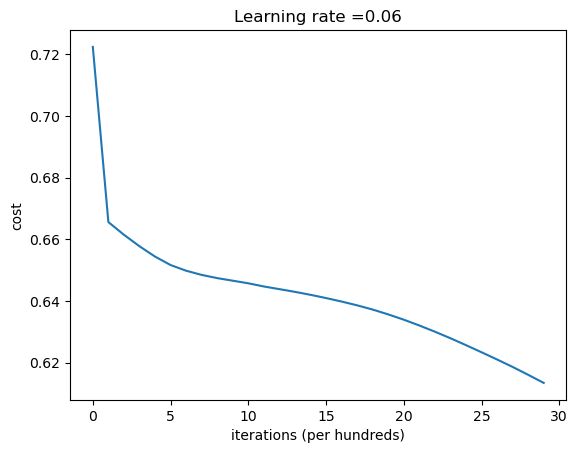

In [27]:
parameters = L_layer_NN(train_set_x, train_set_y, layers_dims, learningRate = 0.06, num_itr = 3000, printCost = True)

In [26]:
print("***Training Set***")
pred = predict(train_set_x, train_set_y, parameters, layers_dims)
print("***Test Set***")
pred = predict(test_set_x, test_set_y, parameters, layers_dims)

***Training Set***
Accuracy : 0.601190476190476
***Test Set***
Accuracy : 0.5416666666666667


In [24]:
pred = pred.astype(int)
print("\n\n Input: ", test_set_x[:, 0])
print("\n\n Target: ", test_set_y[0][0])
print("\n\n Prediction: ", pred[0][0])



 Input:  [0.41841004 0.15789474]


 Target:  0


 Prediction:  0


In [17]:
y_actu = pd.Series(test_set_y[0], name='Actual')
y_pred = pd.Series(pred[0], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,0,1
Actual,,
0,37,12
1,19,4
